#Projects in AI and ML HW4 Task 3

## Part 1: Implementing Word Embeddings

I chose to use Word2Vec as my embedding model. Word2Vec is predictive and it tries to predict the correct target word from its context words based on word vector representations. However, GloVe is count-based. FastText is an improved version of Word2Vec. I chose to use Word2Vec for ease of implementation.

In [2]:
!pip install gensim

import gensim.downloader as api
import numpy as np

# Load pre-trained Word2Vec model
try:
    model = api.load("word2vec-google-news-300")
except Exception as e:
    print(f"Error loading the model: {e}")
    print("Trying to download the model...")
    model = api.load("word2vec-google-news-300")


def get_word_embedding(word):
    """
    Retrieves the word embedding for a given word.
    Handles Out-of-Vocabulary (OOV) words.
    """
    try:
        embedding = model[word]
        return embedding
    except KeyError:
        print(f"Word '{word}' not found in the vocabulary.")
        # OOV handling:
        # 1. Return a zero vector:
        # return np.zeros(model.vector_size)
        # 2. Suggest similar words (if available):
        similar_words = model.most_similar(positive=[word], topn=5)
        if similar_words:
            print("Similar words:", similar_words)
            closest_word = similar_words[0][0]
            print(f"Using the embedding for the most similar word: {closest_word}")
            return model[closest_word]
        else:
            print("No similar words found. Returning a zero vector.")
            return np.zeros(model.vector_size)

while True:
    word1 = input("Enter the first word (or type 'exit' to quit): ")
    if word1.lower() == 'exit':
        break

    word2 = input("Enter the second word: ")
    if word2.lower() == 'exit':
        break

    embedding1 = get_word_embedding(word1)
    embedding2 = get_word_embedding(word2)

    if embedding1 is not None and embedding2 is not None:
        print(f"Embedding for '{word1}': {embedding1[:10]}...")
        print(f"Embedding for '{word2}': {embedding2[:10]}...")

[==================================================] 100.0% 1662.8/1662.8MB downloaded
Enter the first word (or type 'exit' to quit): dog
Enter the second word: cat
Embedding for 'dog': [ 0.05126953 -0.02233887 -0.17285156  0.16113281 -0.08447266  0.05737305
  0.05859375 -0.08251953 -0.01538086 -0.06347656]...
Embedding for 'cat': [ 0.0123291   0.20410156 -0.28515625  0.21679688  0.11816406  0.08300781
  0.04980469 -0.00952148  0.22070312 -0.12597656]...
Enter the first word (or type 'exit' to quit): woman
Enter the second word: man
Embedding for 'woman': [ 0.24316406 -0.07714844 -0.10302734 -0.10742188  0.11816406 -0.10742188
 -0.11425781  0.02563477  0.11181641  0.04858398]...
Embedding for 'man': [ 0.32617188  0.13085938  0.03466797 -0.08300781  0.08984375 -0.04125977
 -0.19824219  0.00689697  0.14355469  0.0019455 ]...
Enter the first word (or type 'exit' to quit): yes
Enter the second word: yeah
Embedding for 'yes': [ 0.11572266 -0.12988281  0.06591797  0.17578125 -0.14355469  0.0

## Part 2: Cosine Similarity Computation

Enter the first word (or type 'exit' to quit): hello
Enter the second word: hi
Embedding for 'hello': [-0.05419922  0.01708984 -0.00527954  0.33203125 -0.25       -0.01397705
 -0.15039062 -0.265625    0.01647949  0.3828125 ]...
Embedding for 'hi': [-0.16503906  0.20410156  0.13085938  0.28710938 -0.16894531 -0.00366211
  0.17285156 -0.27539062 -0.03613281  0.03198242]...
Cosine Similarity between 'hello' and 'hi': 0.654898464679718
Enter word pairs for batch processing (e.g., 'king queen; man woman', or type 'skip'): king queen; man woman; boy girl; cat dog;
Skipping invalid pair: [], it should have two words.
Cosine similarity between 'king' and 'queen': 0.6510956883430481
Cosine similarity between 'man' and 'woman': 0.7664013504981995
Cosine similarity between 'boy' and 'girl': 0.8543272018432617
Cosine similarity between 'cat' and 'dog': 0.760945737361908


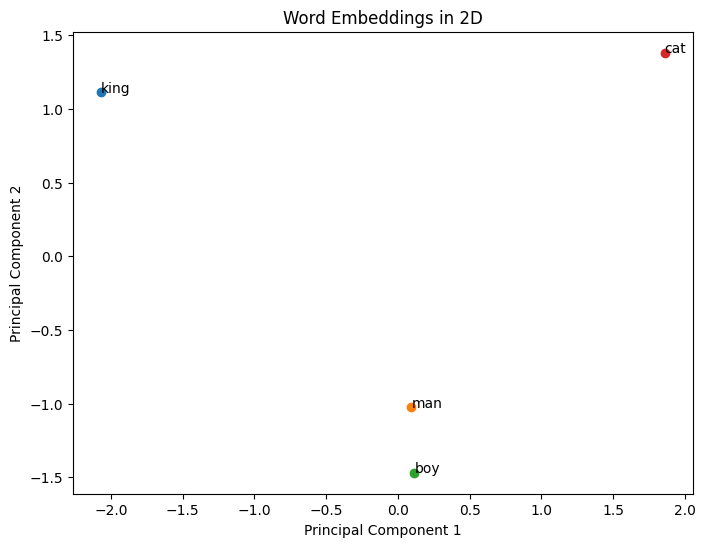

KeyboardInterrupt: Interrupted by user

In [3]:
import gensim.downloader as api
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def cosine_sim(embedding1, embedding2):
    """Computes cosine similarity between two word embeddings."""
    return cosine_similarity(embedding1.reshape(1, -1), embedding2.reshape(1, -1))[0][0]


def process_word_pairs(word_pairs):
    """Processes multiple word pairs and returns their cosine similarities."""
    similarities = []
    embeddings = []
    words = []
    for pair in word_pairs:
        # Check if the pair has enough values before unpacking
        if len(pair) == 2:
            word1, word2 = pair
            embedding1 = get_word_embedding(word1)
            embedding2 = get_word_embedding(word2)
            if embedding1 is not None and embedding2 is not None:
                sim = cosine_sim(embedding1, embedding2)
                similarities.append(sim)
                embeddings.append(embedding1) # store first embedding for visualization
                words.append(word1)  # Store the corresponding words
        else:
            print(f"Skipping invalid pair: {pair}, it should have two words.")
    return similarities, embeddings, words


while True:
    word1 = input("Enter the first word (or type 'exit' to quit): ")
    if word1.lower() == 'exit':
        break

    word2 = input("Enter the second word: ")
    if word2.lower() == 'exit':
        break

    embedding1 = get_word_embedding(word1)
    embedding2 = get_word_embedding(word2)

    if embedding1 is not None and embedding2 is not None:
        print(f"Embedding for '{word1}': {embedding1[:10]}...")
        print(f"Embedding for '{word2}': {embedding2[:10]}...")
        similarity = cosine_sim(embedding1, embedding2)
        print(f"Cosine Similarity between '{word1}' and '{word2}': {similarity}")

    # Batch processing:
    batch_input = input("Enter word pairs for batch processing (e.g., 'king queen; man woman', or type 'skip'): ")
    if batch_input.lower() == 'exit':
      break
    if batch_input.lower() != 'skip':
        word_pairs = [pair.split() for pair in batch_input.split(';')]
        similarities, embeddings, words = process_word_pairs(word_pairs)
        for i, sim in enumerate(similarities):
            print(f"Cosine similarity between '{word_pairs[i][0]}' and '{word_pairs[i][1]}': {sim}")

        # Reduce dimensionality for visualization (PCA)
        if len(embeddings) > 1: # Check if there are at least 2 embeddings for PCA
            pca = PCA(n_components=2)  # Reduce to 2 dimensions for a 2D plot
            embeddings_2d = pca.fit_transform(np.array(embeddings))

            # Plot the embeddings
            plt.figure(figsize=(8, 6))
            for i, word in enumerate(words):
                plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1])
                plt.annotate(word, (embeddings_2d[i, 0], embeddings_2d[i, 1]))

            plt.title("Word Embeddings in 2D")
            plt.xlabel("Principal Component 1")
            plt.ylabel("Principal Component 2")
            plt.show()
        else:
            print("Not enough data points for PCA visualization. Please enter more than one word pair.")



## Part 3: Designing a Novel Dissimilarity Metric

Cosine similarity is useful in word embedding space because it effectively captures the semantic similarity between words by focusing on the direction of vectors as opposed to their magnitudes, which makes it ideal for high-dimensional data like word embeddings, where measuring the distance might not accurately reflect semantic relationships between words.

Enter the first word (or type 'exit' to quit): hello
Enter the second word: bye
Embedding for 'hello': [-0.05419922  0.01708984 -0.00527954  0.33203125 -0.25       -0.01397705
 -0.15039062 -0.265625    0.01647949  0.3828125 ]...
Embedding for 'bye': [-0.03027344  0.06542969  0.09228516 -0.24121094  0.25       -0.04248047
 -0.47851562 -0.5390625   0.08300781  0.24316406]...
Enter dissimilarity metric ('cosine' or 'euclidean'): euclidean
Euclidean Dissimilarity between 'hello' and 'bye': 4.174822807312012
Enter word pairs for batch processing (e.g., 'king queen; man woman', or type 'skip'): king queen; man woman; hello bye; cat dog; yes no; cat lion; table lion
Enter dissimilarity metric ('cosine' or 'euclidean'): euclidean


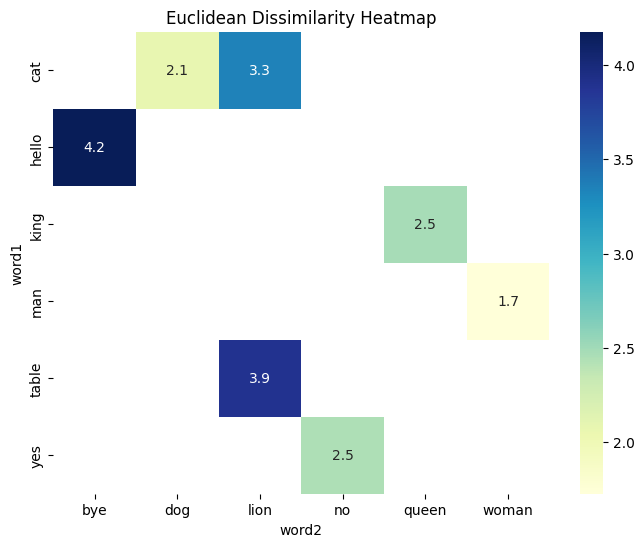

Enter the first word (or type 'exit' to quit): exit


In [6]:
import pandas as pd
from scipy.spatial.distance import euclidean
import seaborn as sns

def euclidean_distance(embedding1, embedding2):
    return euclidean(embedding1, embedding2)

def calculate_dissimilarity(embedding1, embedding2, metric='cosine'):
    if metric == 'cosine':
        return 1 - cosine_sim(embedding1, embedding2)  # Convert similarity to dissimilarity
    elif metric == 'euclidean':
        return euclidean_distance(embedding1, embedding2)
    else:
        raise ValueError("Invalid dissimilarity metric. Choose 'cosine' or 'euclidean'.")

while True:
    word1 = input("Enter the first word (or type 'exit' to quit): ")
    if word1.lower() == 'exit':
        break

    word2 = input("Enter the second word: ")
    if word2.lower() == 'exit':
        break

    embedding1 = get_word_embedding(word1)
    embedding2 = get_word_embedding(word2)
    if embedding1 is not None and embedding2 is not None:
        print(f"Embedding for '{word1}': {embedding1[:10]}...")
        print(f"Embedding for '{word2}': {embedding2[:10]}...")
        metric = input("Enter dissimilarity metric ('cosine' or 'euclidean'): ")
        dissimilarity = calculate_dissimilarity(embedding1, embedding2, metric=metric)
        print(f"{metric.capitalize()} Dissimilarity between '{word1}' and '{word2}': {dissimilarity}")

    # Batch processing:
    batch_input = input("Enter word pairs for batch processing (e.g., 'king queen; man woman', or type 'skip'): ")
    if batch_input.lower() != 'skip':
        word_pairs = [pair.split() for pair in batch_input.split(';')]

        metric = input("Enter dissimilarity metric ('cosine' or 'euclidean'): ")

        dissimilarities = []
        embeddings = []
        words = []
        for word1, word2 in word_pairs:
            embedding1 = get_word_embedding(word1)
            embedding2 = get_word_embedding(word2)
            if embedding1 is not None and embedding2 is not None:
                dissimilarity = calculate_dissimilarity(embedding1, embedding2, metric=metric)
                dissimilarities.append(dissimilarity)
                embeddings.append(embedding1)
                words.append(word1)

        # Create a DataFrame
        data = {'word1': [pair[0] for pair in word_pairs],
                'word2': [pair[1] for pair in word_pairs],
                'dissimilarity': dissimilarities}
        df = pd.DataFrame(data)

        # Create the heatmap
        plt.figure(figsize=(8, 6))
        sns.heatmap(df.pivot(index="word1", columns="word2", values="dissimilarity"), annot=True, cmap="YlGnBu")
        plt.title(f"{metric.capitalize()} Dissimilarity Heatmap")
        plt.show()



I used the Eucliedean distance as my dissimilarity metric.

Overall, I tested these three parts with random words.